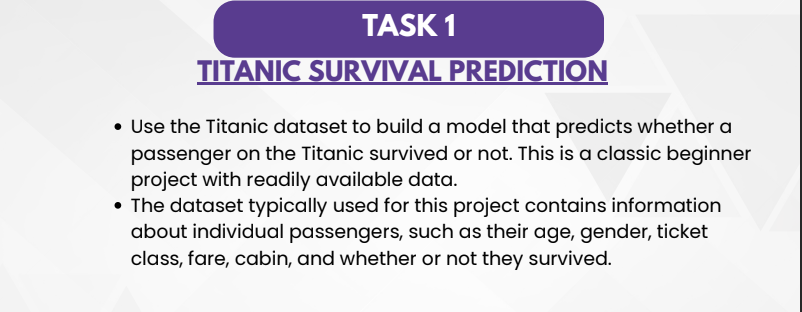

# import Necessary Library

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Read the Data

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

# Explore the Data

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Cleaning the Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Now no missing value in column Age**

In [10]:
df.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket'],inplace=True)

**Drop this column because i don't need it column**

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

# Analysis and Visualization

In [12]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,male,22.0,7.2500,NaN,S
1,1,1,female,38.0,71.2833,C85,C
2,1,3,female,26.0,7.9250,NaN,S
3,1,1,female,35.0,53.1000,C123,S
4,0,3,male,35.0,8.0500,NaN,S


<h2>Survived<h2>

In [13]:
Survived = df['Survived'].value_counts().reset_index()
Survived

,index,Survived
0,0,549
1,1,342


<AxesSubplot:xlabel='Survived', ylabel='count'>

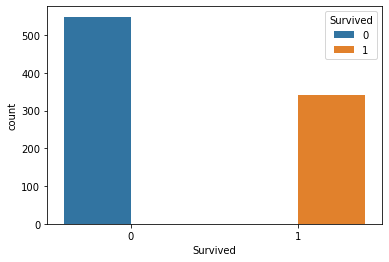

In [14]:
sns.countplot(x=df['Survived'], hue=df['Survived'])

**This graph show the people are Survived and non Survived and 0 == not Survived 1 == Survived**

<h2>Survived from male and female<h2>

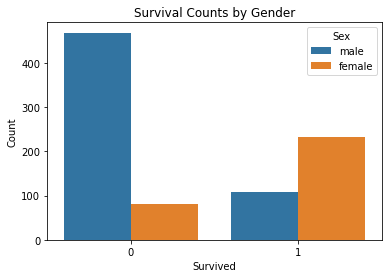

In [15]:

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Counts by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

**we can see the number of Survived and not Survived from male and female**

In [16]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,male,22.0,7.2500,NaN,S
1,1,1,female,38.0,71.2833,C85,C
2,1,3,female,26.0,7.9250,NaN,S
3,1,1,female,35.0,53.1000,C123,S
4,0,3,male,35.0,8.0500,NaN,S


In [17]:
pclass = df['Pclass'].value_counts().reset_index()
pclass

,index,Pclass
0,3,491
1,1,216
2,2,184


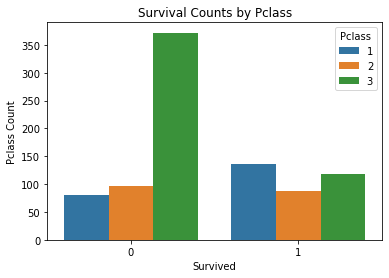

In [18]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Counts by Pclass')
plt.xlabel('Survived')
plt.ylabel('Pclass Count')
plt.show()

**this graph we can see the number of ticket are sell and from any class 1 or 2 or 3 and the graph show the number of Survived in every class**

In [19]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,male,22.0,7.2500,NaN,S
1,1,1,female,38.0,71.2833,C85,C
2,1,3,female,26.0,7.9250,NaN,S
3,1,1,female,35.0,53.1000,C123,S
4,0,3,male,35.0,8.0500,NaN,S


# Train Test Split

In [20]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [21]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [22]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,1,22.000000,7.2500,NaN,S
1,1,1,0,38.000000,71.2833,C85,C
2,1,3,0,26.000000,7.9250,NaN,S
3,1,1,0,35.000000,53.1000,C123,S
4,0,3,1,35.000000,8.0500,NaN,S
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,NaN,S
887,1,1,0,19.000000,30.0000,B42,S
888,0,3,0,29.699118,23.4500,NaN,S
889,1,1,1,26.000000,30.0000,C148,C


In [23]:
x=df[['Sex', 'Pclass']]
y=df['Survived']

In [24]:
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=43)

In [25]:
X_train

,Sex,Pclass
826,1,3
838,1,3
763,0,1
189,1,3
109,0,3
...,...,...
277,1,2
817,1,2
255,0,3
320,1,3


In [26]:
x_test

,Sex,Pclass
770,1,3
853,0,1
144,1,2
141,0,3
261,1,3
...,...,...
71,0,3
423,0,3
342,1,2
825,1,3


In [27]:
Y_train

826    0
838    1
763    1
189    0
109    1
      ..
277    0
817    0
255    1
320    0
836    0
Name: Survived, Length: 712, dtype: int64

In [28]:
y_test

770    0
853    1
144    0
141    1
261    1
      ..
71     0
423    0
342    0
825    0
293    0
Name: Survived, Length: 179, dtype: int64

<h2>Visualization the realtion between the columns using corr<h2>

In [29]:
corrcolumns = df.drop(columns=['Embarked'])
corrcolumns

,Survived,Pclass,Sex,Age,Fare,Cabin
0,0,3,1,22.000000,7.2500,NaN
1,1,1,0,38.000000,71.2833,C85
2,1,3,0,26.000000,7.9250,NaN
3,1,1,0,35.000000,53.1000,C123
4,0,3,1,35.000000,8.0500,NaN
...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,NaN
887,1,1,0,19.000000,30.0000,B42
888,0,3,0,29.699118,23.4500,NaN
889,1,1,1,26.000000,30.0000,C148


In [30]:
corrcolumns.corr()

,Survived,Pclass,Sex,Age,Fare
Survived,1.000000,-0.338481,-0.543351,-0.069809,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.331339,-0.549500
Sex,-0.543351,0.131900,1.000000,0.084153,-0.182333
Age,-0.069809,-0.331339,0.084153,1.000000,0.091566
Fare,0.257307,-0.549500,-0.182333,0.091566,1.000000


<AxesSubplot:>

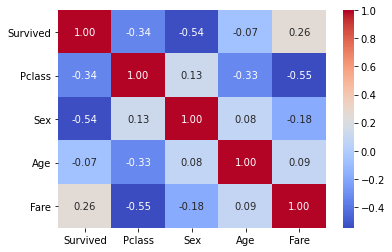

In [31]:
sns.heatmap(corrcolumns.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Logistic Regression Model

In [32]:
logmodel = LogisticRegression(max_iter=5000,  C=0.1)

In [33]:
logmodel.fit(X_train,Y_train)

LogisticRegression(C=0.1, max_iter=5000)

In [34]:
y_pred = logmodel.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [35]:
y_test.values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [36]:
logmodel.score(x_test, y_test)

0.7318435754189944

In [37]:
logmodel.score(X_train, Y_train)

0.800561797752809

# Model Evaluations

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [39]:
confusion_matrix(y_test,y_pred)

array([[93, 17],
       [31, 38]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       110
           1       0.69      0.55      0.61        69

    accuracy                           0.73       179
   macro avg       0.72      0.70      0.70       179
weighted avg       0.73      0.73      0.72       179



In [41]:
import warnings
warnings.filterwarnings("ignore")
res= logmodel.predict([[0,0]])

if(res==0):
    print("Not survived")
else:
    print("survived")

survived


In [42]:
import warnings
warnings.filterwarnings("ignore")
res= logmodel.predict([[2,1]])

if(res==0):
    print("Not survived")
else:
    print("survived")

Not survived
